# Linear Fitting - Exercises

1. <em> Try to extend the model to fit a polynomial of order <code>N</code>.</em>

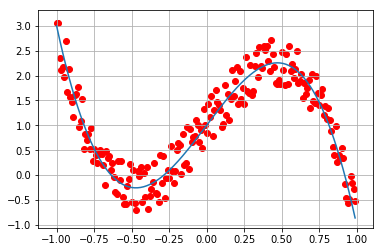

In [21]:
# here we are going to use Keras and numpy
import numpy as np

# polynomial coefficients
a0 = 1; a1 = 4.; a2 = -2; a3 = -4;

# generate training inputs
x = np.arange(-1, 1, 0.01)
# ideal (target) polynomial function
y_target = a3 * x**3 + a2 * x**3 + a1 * x + a0

noise_amp = 1.0 # noise amplitude
y_train = y_target + noise_amp * (np.random.rand(len(x))-0.5) # actual measures from which we want to guess regression parameters

# plot training and target dataset
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y_target)
plt.scatter(x, y_train, color='r')
plt.grid(True); plt.show()

In [36]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add( Dense(4, input_shape=(1,), activation='tanh'))
model.add( Dense(1, use_bias=False) )

# compile the model choosing optimizer, loss and metrics objects
# optimizer=keras.optimizers.SGD(lr=0.1, decay=0.001)
optimizer=keras.optimizers.Adam(lr=0.1)
model.compile(optimizer=optimizer, loss='mse') #, metrics=['mse']) # metrics is optional here

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 4         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Plot estimated Y from current training status
import tensorflow as tf
from IPython.display import clear_output
class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, update_freq=10):
        self.epoch = 0
        self.update_freq=update_freq
    def on_epoch_end(self, epoch, logs={}):
        self.epoch += 1
        if self.epoch%self.update_freq:
            temp = self.model.predict(self.validation_data[0])
            y_curr = list(temp[:]) # convert numpy array into list
            clear_output(wait=True)            
            eplot = plt.subplot(1,1,1)
            eplot.clear()     
            eplot.scatter(self.validation_data[0], y_curr, color="blue", s=4, marker="o", label="estimate")
            eplot.scatter(self.validation_data[0], self.validation_data[1], color="red", s=4, marker="x", label="valid")
            eplot.legend(); plt.show()



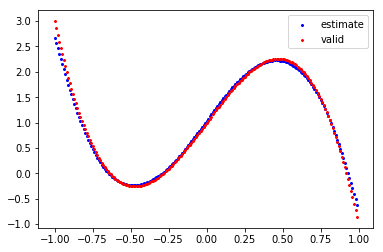

200/200 [==============================] - 0s 2ms/step - loss: 0.0867 - val_loss: 0.0051


In [38]:
# we have to choice the batch_size and epochs
batch_size=100 # defaults to 32
epochs=2000

trainplot = PlotCurrentEstimate()
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x, y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=[trainplot, earlystop],
          validation_data=(x, y_target), # used to evaluate the loss and any model metrics at each epoch
          verbose=1, # 1 get a line per epoch reporting loss and metric data
          )

In [ ]:
plt.plot(x, y_target, label='valid')
y_pred = model.predict(x, batch_size=batch_size)
plt.scatter(x, y_pred, color='r', label='predicted')
plt.legend(); plt.grid(True); plt.show()

<em>How many layers do you need? </em><br>
You need at least two layers: first layer with as many neurons as the polinomial degree (this layer will output a vector of degree shape), one last layer to match required dimensionality (1D dimension) and codomain range values of Y samples.

<em>Can you make good prediction using a non-linear activation function?</em><br>
No, you can't, because each neuron with no activation function is able to perform only linear transofrmation, so you can't combine linear transforms to resamble a non linear behaviour. You need to apply an activation function in order to alter/deform the linear transformation output space.

<em>Can you identify the meaning of weights?</em><br>
Not so easily guy! :-) You might be tempted to interpret first layer's weights as the polinomial coefficients. Yet, even with a very simple model with 2 layers (Dense(3),Dense(1)), identification is pratically unfeasible as weigths go through activation functions which alter their mapping with the polynomial coefficients

In [ ]:
for l in model.layers:
    w = l.get_weights()
    print("weigths", w[0])

<em>Try to extend the model with at least two layers and fit a 2D Gaussian distribution or a simple trigonometric 2D function such as <code>f(x,y) = sin(x+y)</code></em>

In [ ]:
# here we are going to use Keras and numpy
import numpy as np

# f(x,y) = sin(a0*x + a1*y) 
a0 = 1; a1 = 2.;

# generate training inputs
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sin(2*X**2 + 4*Y**2)
Z_train = Z + (np.random.rand(len(Z))-0.5)

# Plot the surface.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
#ax.plot_surface(X, Y, Z_train)
